In [32]:
import timm
import torch
import dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [14]:
resnet50 = timm.create_model('resnet50', pretrained=True, num_classes=2)
vit = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=2)

resnet50.eval()
vit.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [17]:
ds_train, ds_valid, class_weights = dataset.get_dataset('data/oxford_pets')

dl_valid = DataLoader(ds_valid, batch_size=32, shuffle=False, num_workers=5)

In [18]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in dl_valid:
        outputs = resnet50(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Exibindo a acurácia
accuracy = 100 * correct / total
print(f'Acurácia do modelo: {accuracy:.2f}%')

Acurácia do modelo: 60.72%


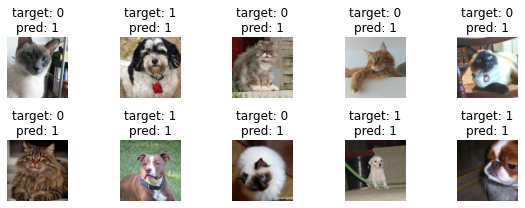

In [24]:
fig, axs = plt.subplots(2, 5, figsize=(8,3))
axs = axs.reshape(-1)
for idx in range(10):
    img, target = ds_valid[idx^2]
    with torch.no_grad():
        scores = resnet50(img.unsqueeze(0))
        pred = torch.argmax(scores)
    axs[idx].imshow(dataset.unormalize(img))
    axs[idx].set_title(f'target: {target}\npred: {pred}')
    axs[idx].set_axis_off()
plt.tight_layout()

In [19]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in dl_valid:
        outputs = vit(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Exibindo a acurácia
accuracy = 100 * correct / total
print(f'Acurácia do modelo: {accuracy:.2f}%')

Acurácia do modelo: 49.83%


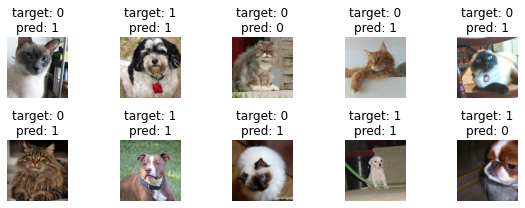

In [23]:
fig, axs = plt.subplots(2, 5, figsize=(8,3))
axs = axs.reshape(-1)
for idx in range(10):
    img, target = ds_valid[idx^2]
    with torch.no_grad():
        scores = vit(img.unsqueeze(0))
        pred = torch.argmax(scores)
    axs[idx].imshow(dataset.unormalize(img))
    axs[idx].set_title(f'target: {target}\npred: {pred}')
    axs[idx].set_axis_off()
plt.tight_layout()

## 10% de oclusão

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


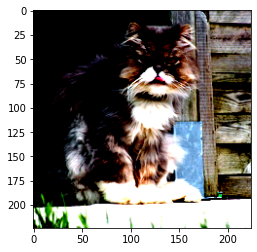

In [36]:
plt.imshow(ds_valid[0][0].permute(1,2,0))


In [77]:
img = ds_valid[0][0]
img = img.permute(1,2,0)
box = [76, 76, 147, 147]
patch = img[bbox[0]:bbox[2], bbox[1]:bbox[3]]
# Média de intensidade
color = torch.mean(patch)
# Substituição dos valores
img[bbox[0]:bbox[2], bbox[1]:bbox[3]] = color

In [78]:
for img, label in ds_valid:
    img = img.permute(1,2,0)
    bbox = [76, 76, 147, 147]
    patch = img[bbox[0]:bbox[2], bbox[1]:bbox[3]]
    # Média de intensidade
    color = torch.mean(patch)
    # Substituição dos valores
    img[bbox[0]:bbox[2], bbox[1]:bbox[3]] = color

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


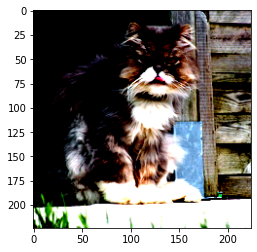

In [79]:
plt.imshow(ds_valid[0][0].permute(1,2,0))